In [115]:
import numpy as np
import pandas as pd
import seaborn as sns

In [116]:
train_df=pd.read_csv(r'D:\Kaggle_Projects\Boston\house-prices-advanced-regression-techniques\train.csv')
test_df=pd.read_csv(r'D:\Kaggle_Projects\Boston\house-prices-advanced-regression-techniques\test.csv')

In [117]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [118]:
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [119]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [120]:
pd.set_option('display.max_rows',None)

train_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [121]:
test_df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [122]:
train_df_new = train_df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis =1)

In [123]:
test_df_new = test_df.drop(['Alley','PoolQC','Fence','MiscFeature','FireplaceQu'],axis =1)

In [124]:
train_df[0:1]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


<AxesSubplot:>

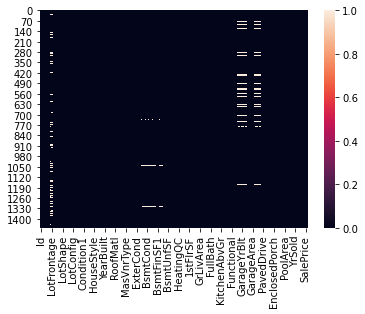

In [125]:
sns.heatmap(train_df_new.isna())

<AxesSubplot:>

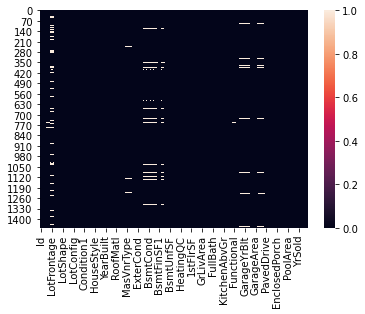

In [126]:
sns.heatmap(test_df_new.isna())

In [127]:
train_df_new.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [128]:
train_df_new.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


<AxesSubplot:>

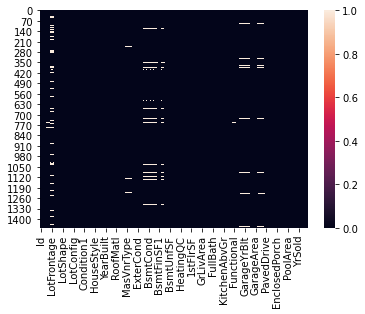

In [129]:
train_df_new['LotFrontage']=train_df_new['LotFrontage'].fillna(value = train_df_new['LotFrontage'].mean())
train_df_new['MasVnrType']=train_df_new['MasVnrType'].fillna(value = train_df_new['MasVnrType'].mode()[0])
train_df_new['MasVnrArea']=train_df_new['MasVnrArea'].fillna(value = train_df_new['MasVnrArea'].mean())
train_df_new['BsmtQual']=train_df_new['BsmtQual'].fillna(value = train_df_new['BsmtQual'].mode()[0])
train_df_new['BsmtCond']=train_df_new['BsmtCond'].fillna(value = train_df_new['BsmtCond'].mode()[0])
train_df_new['BsmtExposure']=train_df_new['BsmtExposure'].fillna(value = train_df_new['BsmtExposure'].mode()[0])
train_df_new['BsmtFinType1']=train_df_new['BsmtFinType1'].fillna(value = train_df_new['BsmtFinType1'].mode()[0])
train_df_new['BsmtFinType2']=train_df_new['BsmtFinType2'].fillna(value = train_df_new['BsmtFinType2'].mode()[0])
train_df_new['GarageType']=train_df_new['GarageType'].fillna(value = train_df_new['GarageType'].mode()[0])
train_df_new['GarageYrBlt']=train_df_new['GarageYrBlt'].fillna(value = train_df_new['GarageYrBlt'].mean())
train_df_new['GarageFinish']=train_df_new['GarageFinish'].fillna(value = train_df_new['GarageFinish'].mode()[0])
train_df_new['GarageQual']=train_df_new['GarageQual'].fillna(value = train_df_new['GarageQual'].mode()[0])
train_df_new['GarageCond']=train_df_new['GarageCond'].fillna(value = train_df_new['GarageCond'].mode()[0])
train_df_new['Electrical'] = train_df_new['Electrical'].dropna()
sns.heatmap(test_df_new.isna())

In [130]:
test_df_new['LotFrontage']=test_df_new['LotFrontage'].fillna(value = test_df_new['LotFrontage'].mean())
test_df_new['MasVnrType']=test_df_new['MasVnrType'].fillna(value = test_df_new['MasVnrType'].mode()[0])
test_df_new['MasVnrArea']=test_df_new['MasVnrArea'].fillna(value = test_df_new['MasVnrArea'].mean())
test_df_new['BsmtQual']=test_df_new['BsmtQual'].fillna(value = test_df_new['BsmtQual'].mode()[0])
test_df_new['BsmtCond']=test_df_new['BsmtCond'].fillna(value = test_df_new['BsmtCond'].mode()[0])
test_df_new['BsmtExposure']=test_df_new['BsmtExposure'].fillna(value = test_df_new['BsmtExposure'].mode()[0])
test_df_new['BsmtFinType1']=test_df_new['BsmtFinType1'].fillna(value = test_df_new['BsmtFinType1'].mode()[0])
test_df_new['BsmtFinType2']=test_df_new['BsmtFinType2'].fillna(value = test_df_new['BsmtFinType2'].mode()[0])
test_df_new['GarageType']=test_df_new['GarageType'].fillna(value = test_df_new['GarageType'].mode()[0])
test_df_new['GarageYrBlt']=test_df_new['GarageYrBlt'].fillna(value = test_df_new['GarageYrBlt'].mean())
test_df_new['GarageFinish']=test_df_new['GarageFinish'].fillna(value = test_df_new['GarageFinish'].mode()[0])
test_df_new['GarageQual']=test_df_new['GarageQual'].fillna(value = test_df_new['GarageQual'].mode()[0])
test_df_new['GarageCond']=test_df_new['GarageCond'].fillna(value = test_df_new['GarageCond'].mode()[0])


In [131]:
test_df_new.isna().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        2
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      1
Exterior2nd      1
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       1
BsmtFinType2     0
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     2
BsmtHalfBath     2
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

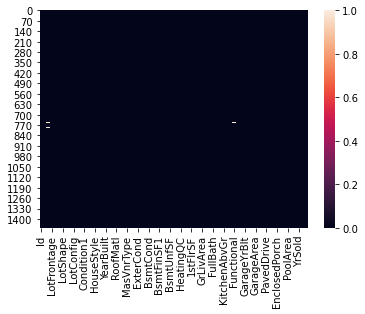

In [132]:
sns.heatmap(test_df_new.isna())

In [133]:
train_df_new=train_df_new.dropna()

<AxesSubplot:>

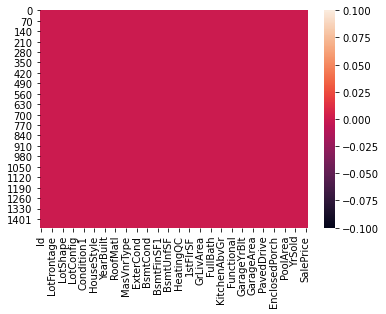

In [134]:
sns.heatmap(train_df_new.isna())

In [135]:
#train_df_new = train_df_new.drop(['SalePrice'],axis =1)

In [136]:
train_df_new.nunique()

Id               1459
MSSubClass         15
MSZoning            5
LotFrontage       111
LotArea          1072
Street              2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          4
MasVnrArea        328
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          752
2ndFlrSF          417
LowQualFinSF       24
GrLivArea 

In [137]:
train_df_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

test_df_new.shape

In [138]:
test_df_new.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [139]:
train_df_new.shape

(1459, 76)

In [140]:
test_df_new.shape

(1459, 75)

In [141]:
final = pd.concat([train_df_new,test_df_new], axis =0)

<AxesSubplot:>

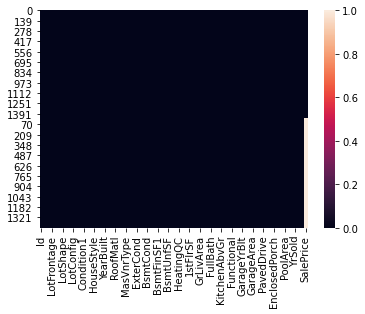

In [142]:
sns.heatmap(final.isna())

In [143]:
final_df = final.loc[:,~final.columns.duplicated()].copy()

In [144]:
final_df.shape

(2918, 76)

In [145]:
categorical = final.select_dtypes(include=['object']).columns.tolist()

In [146]:
type(categorical)

list

In [147]:
one_hot = pd.get_dummies(final , columns = categorical)

In [148]:
one_hot = one_hot.loc[:,~one_hot.columns.duplicated()]

In [149]:
one_hot.shape

(2918, 272)

In [150]:
one_hot.drop(['Id'],inplace = True,axis =1)

In [151]:
new_train = one_hot.iloc[:1459,:]
new_test = one_hot.iloc[1459:,:]

In [152]:
xtrain = new_train.drop(['SalePrice'],axis =1 )
ytrain = new_train['SalePrice']

In [153]:
import xgboost
regressor = xgboost.XGBRegressor()
regressor.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [154]:
new_test = new_test.drop(['SalePrice'],axis = 1)

In [155]:
 pred = regressor.predict(new_test)

In [156]:
pred = pd.DataFrame(pred)

In [157]:
submission = pd.read_csv(r'D:\Kaggle_Projects\Boston\house-prices-advanced-regression-techniques\sample_submission.csv')

In [158]:
dataset = pd.concat([submission['Id'],pred],axis =1)

In [159]:
dataset.columns = ['Id','SalePrice']
dataset.to_csv(r'D:\Kaggle_Projects\Boston\house-prices-advanced-regression-techniques\submission.csv',index =False)

In [164]:
dataset.shape

(1459, 2)